In [10]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import kde
import seaborn as sns
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

In [11]:
np.random.RandomState(12345)

In [12]:

#new anti correlated best
#55,56,59,63,83,94,95,100,121,125,131.2,            11
#strong signal medium anti correlation:
#43,80,98,102,103,Nenad                             6

#cs = ["slide_21","slide_22","slide_23","slide_24","slide_24","slide_31","slide_32","slide_33","slide_34","slide_35"]


lb = ["P055","P056","P059","P063","P083","P094","P095","P100","P121","P125","P131.2","P043","P080","P098","P102","P103","Nenad"]
lb1 = ["P131.2', 'P059'"]
cs = ["slide_21","slide_22","slide_23",#"slide_24","slide_25",
      "slide_26","slide_27","slide_28",#"slide_29","slide_30",
      "slide_31","slide_32","slide_33",#"slide_34","slide_35",
      "slide_36","slide_37"]#,"slide_39","slide_40"]

spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=cs)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
a = spots_dj
#spots_dj = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = lb)
spots_dj = spots_dj.filter(circle_quality__gte = 0.3)


In [13]:
reload(a2)

<module 'analysis2' from '/home/janek89/Dev/flutype_analysis_web/analysis2.py'>

In [14]:
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(300).clean()

/home/janek89/Dev/flutype_analysis_web/analysis2.py:128: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Test", row)
/home/janek89/Dev/flutype_analysis_web/analysis2.py:129: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Train", tuple(set(cs) - set(row)))
/home/janek89/Dev/flutype_analysis_web/preprocessing.py:13: RuntimeWarning: invalid value encountered in double_scalars
  modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in ys]


In [15]:
c_test_data = data.train_test_combinations["Test"][0]
c_train_data = data.train_test_combinations["Train"][0]



In [16]:
testd = data.subset_collection(c_test_data)
traind = data.subset_collection(c_train_data)

/home/janek89/Dev/flutype_analysis_web/analysis2.py:128: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Test", row)
/home/janek89/Dev/flutype_analysis_web/analysis2.py:129: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Train", tuple(set(cs) - set(row)))


In [17]:
from matplotlib.lines import Line2D
reload(a2)

<module 'analysis2' from '/home/janek89/Dev/flutype_analysis_web/analysis2.py'>

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


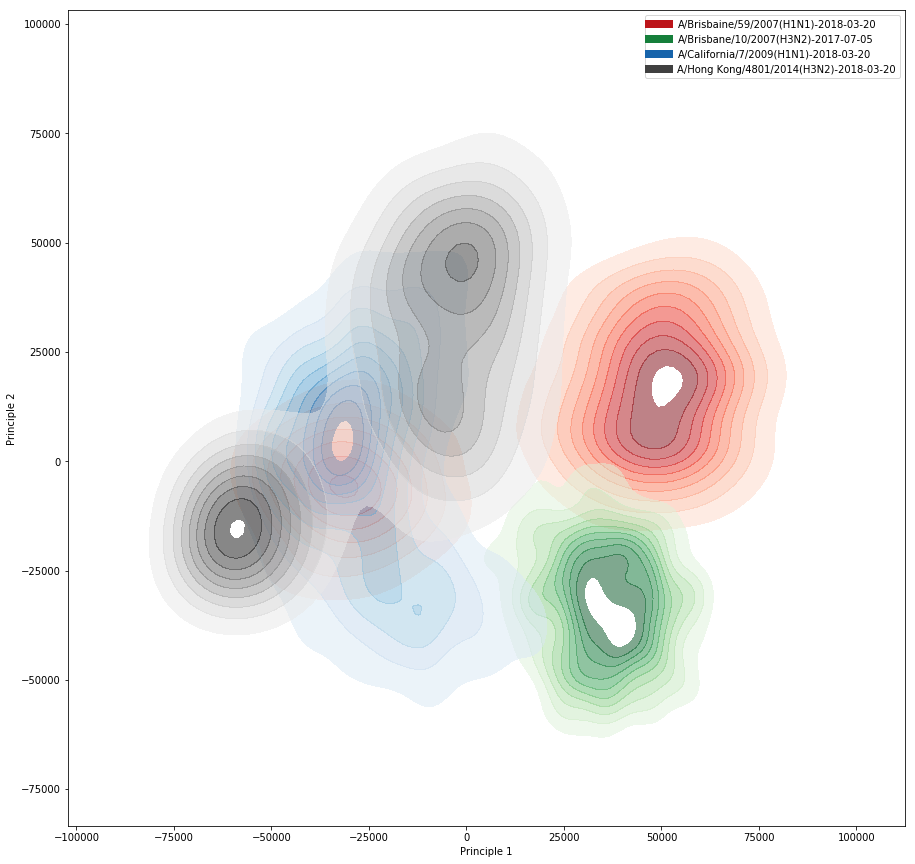

In [23]:

#data_test = pd.DataFrame(traind.x_lda_fit().transform(testd.x),index=testd.x.index , columns =["Principle 1", "Principle 2"])
#data_train = pd.DataFrame(traind.x_lda_fit().transform(traind.x),index=traind.x.index , columns =["Principle 1", "Principle 2"])
#data_test = pd.DataFrame(traind.x_pca_fit().transform(testd.x),index=testd.x.index , columns =["Principle 1", "Principle 2"])
#data_train = pd.DataFrame(traind.x_pca_fit().transform(traind.x),index=traind.x.index , columns =["Principle 1", "Principle 2"])
data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,:2],index=data.x.index , columns =["Principle 1", "Principle 2"])

def lda_plot(data, ax,contour=False, **kwargs):
    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, cmap=cmap, label=n,ax=ax ,  shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2",ax=ax, label=n,c=c ,**kwargs)

        
def add_legend(ax):
    a=[]
    cmaps = ["Reds","Greens","Blues","Greys"]
    for n,d in data1.groupby("Analyte Batch"):
        a.append(n)
    cmmaps = [plt.get_cmap(name) for name in cmaps]
    custom_lines = [Line2D([0], [0], color=c(0.8), lw=8) for c in cmmaps]
    ax.legend(custom_lines,a)

fig, ax = plt.subplots(figsize=(15,15))
#lda_plot(data_ldatrain,ax,contour=True,alpha=0.5)
#lda_plot(data_ldatest,ax,contour=True,alpha=0.5)
lda_plot(data1,ax,contour=True,alpha=0.5)

add_legend(ax)


#lda_plot(data1,ax,marker="x")

plt.show()